In [4]:
%matplotlib inline
import numpy as np
import neurolab as nl
from matplotlib import pyplot

In [5]:
# N E R O
target =  [[1,0,0,0,1,
           1,1,0,0,1,
           1,0,1,0,1,
           1,0,0,1,1,
           1,0,0,0,1],
          [1,1,1,1,1,
           1,0,0,0,0,
           1,1,1,1,1,
           1,0,0,0,0,
           1,1,1,1,1],
          [1,1,1,1,0,
           1,0,0,0,1,
           1,1,1,1,0,
           1,0,0,1,0,
           1,0,0,0,1],
          [0,1,1,1,0,
           1,0,0,0,1,
           1,0,0,0,1,
           1,0,0,0,1,
           0,1,1,1,0]]

chars = ['N', 'E', 'R', 'O']
target = np.asfarray(target)
target[target == 0] = -1

# Create and train network
net = nl.net.newhop(target)

output = net.sim(target)
print("Test on train samples:")
for i in range(len(target)):
    print(chars[i], (output[i] == target[i]).all())

print("\nTest on defaced N:")
test =np.asfarray([0,0,0,0,0,
                   1,1,0,0,1,
                   1,1,0,0,1,
                   1,0,1,1,1,
                   0,0,0,1,1])
test[test==0] = -1
out = net.sim([test])
print ((out[0] == target[0]).all(), 'Sim. steps',len(net.layers[0].outs))

Test on train samples:
N True
E True
R True
O True

Test on defaced N:
True Sim. steps 2


Prototypes shape: (325, 4096), elements: [-1  1]
Test patterns shape: (500, 4096), elements: [-1  1]


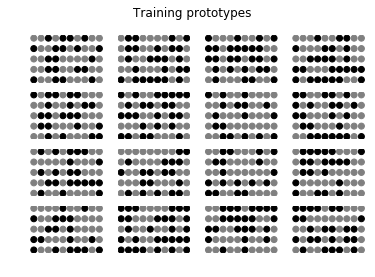

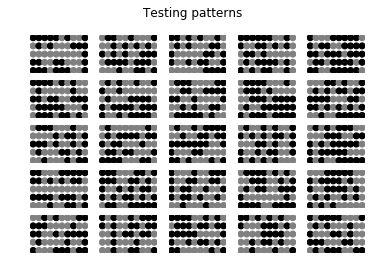

In [6]:
np.random.seed(0)
# training prototyps
prototypes = np.random.choice([-1, +1], [325, 4096])
fig, axes = pyplot.subplots(4, 4)
fig.suptitle('Training prototypes')
for i, ax in enumerate(axes.flatten()):
    ax.axis('off')
    if i >= len(prototypes):
        continue
    colors = ['gray' if prototypes[i, j] == 1 else 'black' for j in range(prototypes.shape[1])]
    ax.scatter(np.repeat(list(range(10)), 5), np.tile(list(range(5)), 10), c=colors)

# testing patterns
vectors = np.random.choice([-1, +1], [500, 4096])
fig, axes = pyplot.subplots(5, 5)
fig.suptitle('Testing patterns')
for i, ax in enumerate(axes.flatten()):
    ax.axis('off')
    if i >= len(vectors):
        continue
    colors = ['gray' if vectors[i, j] == 1 else 'black' for j in range(vectors.shape[1])]
    ax.scatter(np.repeat(list(range(10)), 5), np.tile(list(range(5)), 10), c=colors)

print("Prototypes shape: {}, elements: {}".format(prototypes.shape, np.unique(prototypes)))
print("Test patterns shape: {}, elements: {}".format(vectors.shape, np.unique(vectors)))

In [7]:
target = prototypes

# Create and train network
net = nl.net.newhop(target)
print('trained!')
output = net.sim(target)

out = net.sim(vectors)

trained!


In [ ]:
out.

In [ ]:
for j in range(len(out)):
    for i in range(len(target)):
        if sum(out[j] == target[i]) == 4096:
            print(j,i)